In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets

## Naive Bayes
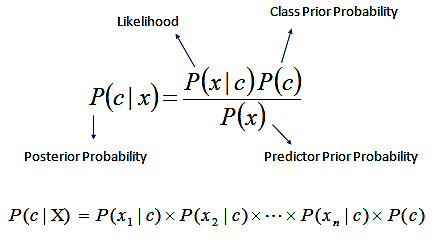
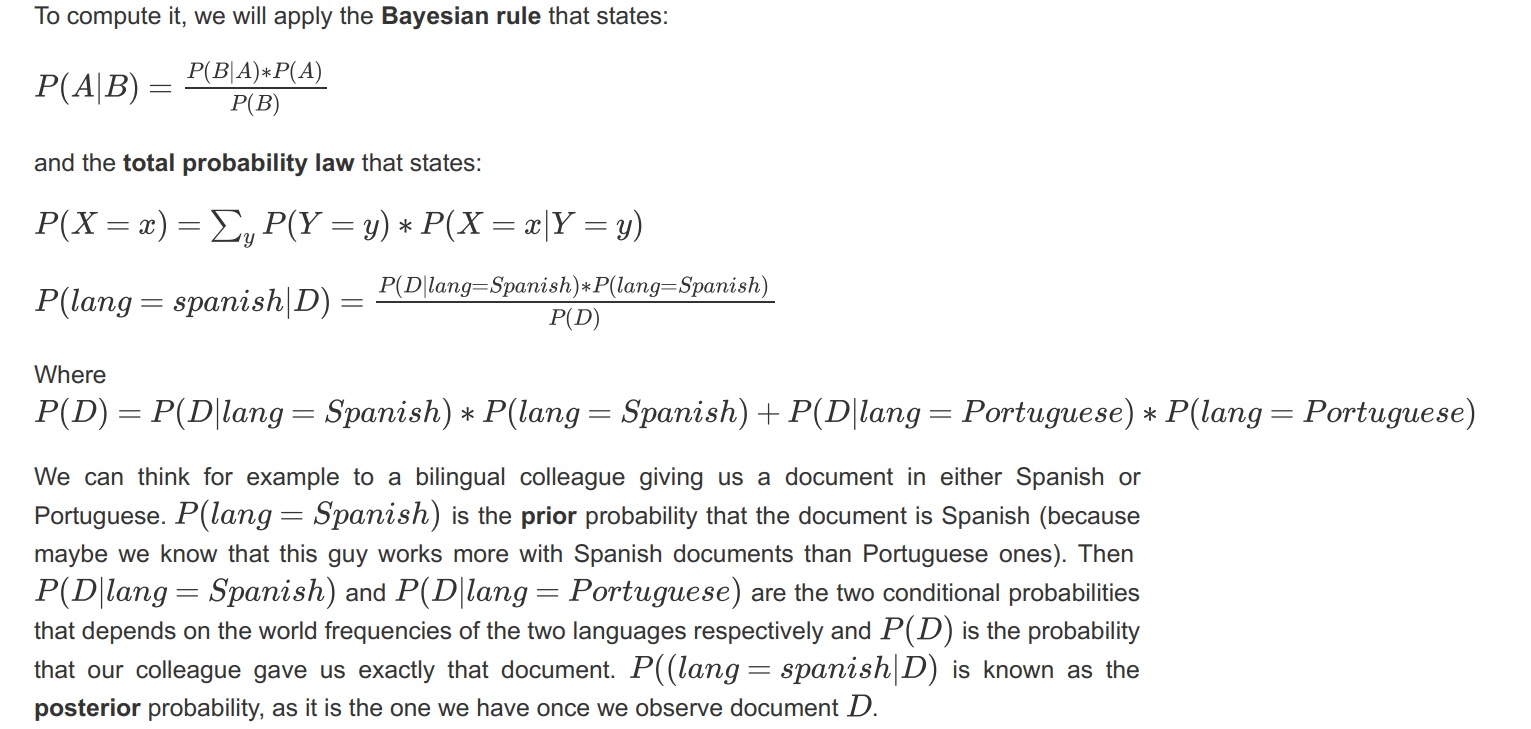
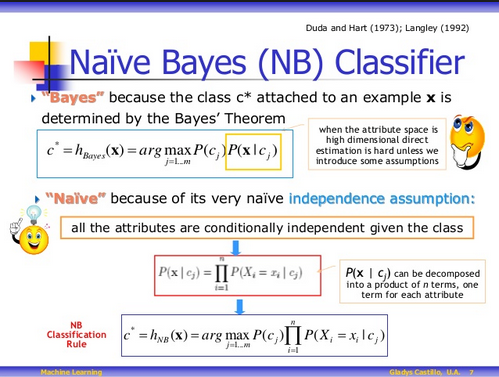


In [32]:
class NaiveBayes:
    ##### Fit Model ######
    def _estimate_class_parameters(self, X_k):
        
        class_parameters = []
        
        for d in range(self.D):          
            X_kd = X_k[:,d]  # only the dth column and the kth class
            
            if self.distributions[d] == 'normal':
                mu = np.mean(X_kd)
                sigma2 = np.var(X_kd)
                class_parameters.append([mu, sigma2])
                
            if self.distributions[d] == 'bernouli':
                p = np.mean(X_kd)
                class_parameters.append(p)
                
            if self.distributions[d] == 'poisson':
                lam = np.mean(X_kd)
                class_parameters.append(lam)
                
        return class_parameters
    
    def fit(self, X, y, distributions = None):
        ## Record info 
        self.N,self.D = X.shape
        self.X = X
        self.y = y
        if distributions is None:
            distributions = ['normal' for i in range(len(y))]
        
        self.distributions = distributions

        ## Get prior probabilities
        self.unique_y, unique_y_counts = np.unique(self.y, return_counts = True) #  returns unique y and counts
        self.pi_ks = unique_y_counts/self.N


 ## Estimate parameters 
        self.parameters = []
        for i, k in enumerate(self.unique_y):
            X_k = self.X[self.y == k]
            self.parameters.append(self._estimate_class_parameters(X_k))


    ######## Make Classifications  #######

    def _get_class_probability(self,x_n,j):

        class_parameters = self.parameters[j] #j is index of kth class
        class_probability = 1

        for d in range(self.D):
            x_nd = x_n[d] # just the dth variable in observation x_n

            if self.distributions[d] == 'normal': 
                mu, sigma2 = class_parameters[d] 
                class_probability *= sigma2**(-1/2)*np.exp(-(x_nd-mu)**2/sigma2)

            if self.distributions[d] == 'bernoulli':
                p = class_parameters[d]
                class_probability *= (p**x_nd)*(1-p)**(1-x_nd) 

            if self.distributions[d] == 'poisson': 
                lam = class_parameters[d]
                class_probability *= np.exp(-lam)*lam**x_nd

        return class_probability

    def classify(self, X_test):

        y_n = np.empty(len(X_test))
        for i, x_n in enumerate(X_test):# loop through test observations

            x_n = x_n.reshape(-1,1)
            p_ks = np.empty(len(self.unique_y))

            for j, k in enumerate(self.unique_y): # loop through classes

                p_x_given_y = self._get_class_probability(x_n, j)
                p_y_given_x = self.pi_ks[j]*p_x_given_y # bayes'rule

                p_ks[j] = p_y_given_x

            y_n[i] = self.unique_y[np.argmax(p_ks)]

        return y_n
    
    
    

In [33]:
wine = datasets.load_wine() 
X,y=wine.data,wine.target

In [34]:
nb = NaiveBayes()
nb.fit(X,y)
yhat = nb.classify(X)
np.mean(yhat == y)

0.9775280898876404